#### About

> Data mining

Data mining is the process of discovering patterns, trends and insights from large data sets. This involves using a variety of statistical and machine learning techniques to identify meaningful relationships and patterns in the data. 

For example, a retail company can use data mining to analyze customer buying patterns and determine which products are most popular at any given time of year. This information can help companies optimize their inventory and marketing strategies, thereby increasing sales and profitability.



In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
X = df.iloc[:, :-1].values


In [5]:
#optimal number of cluster using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

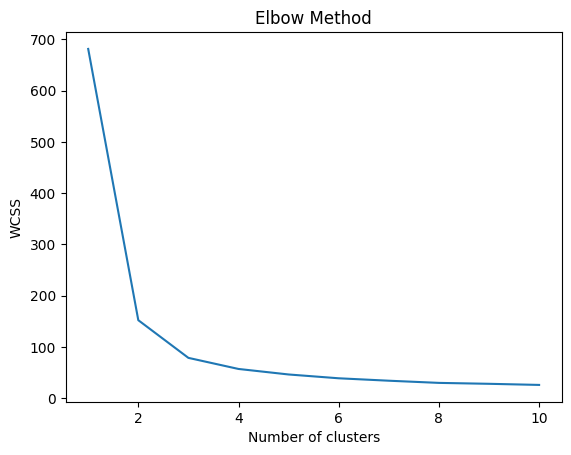

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
#reapplying k means with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

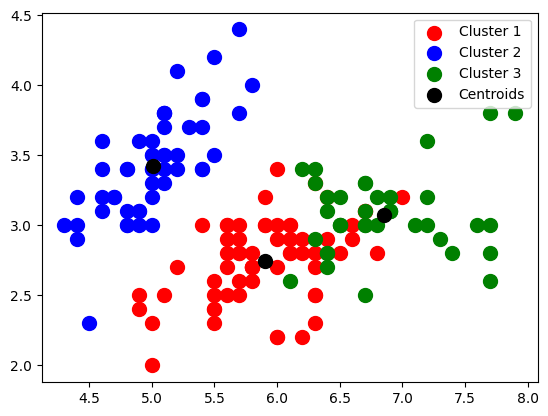

In [8]:
#visualizing clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()